<a href="https://colab.research.google.com/github/swathikapendala/BATCH-11/blob/main/labtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

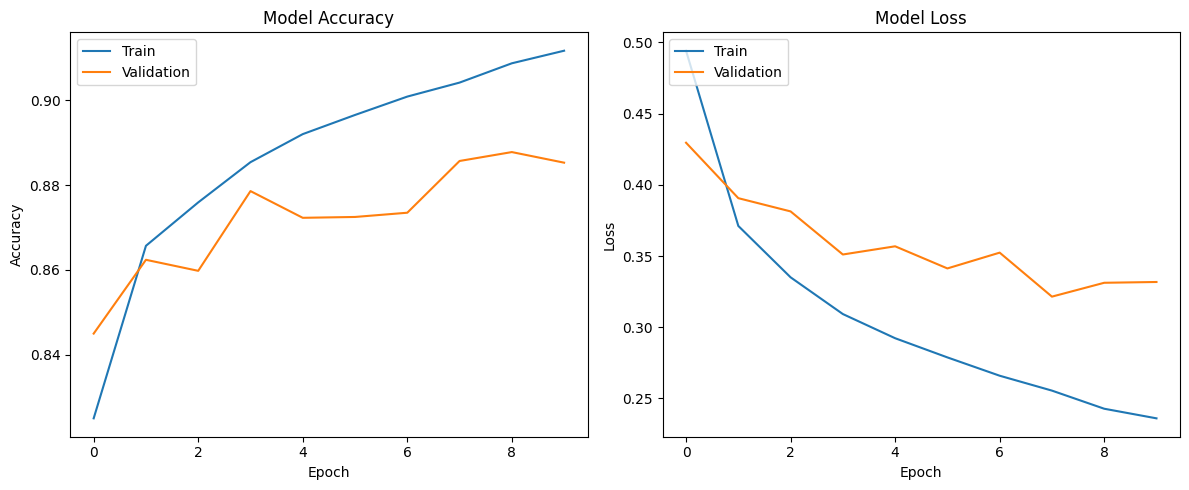

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8853 - loss: 0.3318

Test accuracy: 0.8853
Test loss: 0.3318


In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7827 - loss: 0.6213 - val_accuracy: 0.8450 - val_loss: 0.4295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8622 - loss: 0.3806 - val_accuracy: 0.8624 - val_loss: 0.3906
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.3393 - val_accuracy: 0.8598 - val_loss: 0.3813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8832 - loss: 0.3127 - val_accuracy: 0.8786 - val_loss: 0.3511
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8941 - loss: 0.2882 - val_accuracy: 0.8723 - val_loss: 0.3568
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8995 - loss: 0.2733 - val_accuracy: 0.8725 - val_loss: 0.3413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9014 - loss: 0.2615 - val_accuracy: 0.8735 - val_loss: 0.3524
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9063 - loss: 0.2524 -

In [5]:
import tensorflow as tf
from tensorflow import keras

# Define the 3-layer neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input layer: Flattens the 28x28 images to a 784-pixel array
    keras.layers.Dense(128, activation='relu'),   # Hidden layer: 128 neurons with ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer: 10 neurons (one for each class) with Softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Data Preprocessing: Normalization

Image pixel values typically range from 0 to 255. For neural networks, it's often beneficial to normalize these values to a smaller range, such as 0 to 1. This helps in faster convergence during training and can prevent issues like exploding or vanishing gradients.

In [4]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display basic information about the dataset after normalization
print(f"Data type of training images after normalization: {train_images.dtype}")
print(f"Minimum pixel value in training images after normalization: {train_images.min()}")
print(f"Maximum pixel value in training images after normalization: {train_images.max()}")

Data type of training images after normalization: float64
Minimum pixel value in training images after normalization: 0.0
Maximum pixel value in training images after normalization: 1.0


In [2]:
# Display basic information about the dataset
print(f"Data type of training images: {train_images.dtype}")
print(f"Minimum pixel value in training images: {train_images.min()}")
print(f"Maximum pixel value in training images: {train_images.max()}")

print(f"Data type of training labels: {train_labels.dtype}")
print(f"Unique labels in training set: {tf.unique(train_labels).y.numpy()}")


Data type of training images: uint8
Minimum pixel value in training images: 0
Maximum pixel value in training images: 255
Data type of training labels: uint8
Unique labels in training set: [9 0 3 2 7 5 1 6 4 8]


### Sample Input Images

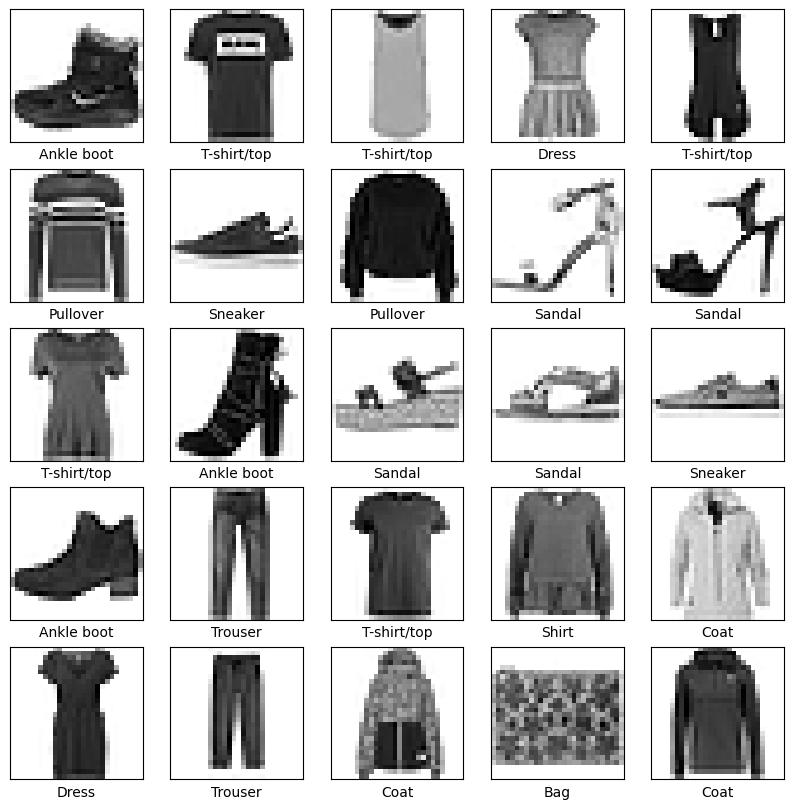

In [3]:
import matplotlib.pyplot as plt

# Define the class names for Fashion MNIST (optional, but helpful for visualization)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate a classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)

# Print the classification report in a readable format
print("Classification Report:\n")
for class_name in class_names:
    print(f"Class: {class_name}")
    print(f"  Precision: {report[class_name]['precision']:.4f}")
    print(f"  Recall:    {report[class_name]['recall']:.4f}")
    print(f"  F1-Score:  {report[class_name]['f1-score']:.4f}")
    print(f"  Support:   {report[class_name]['support']}")
    print("---------------------------------------------------")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Macro Avg F1-Score: {report['macro avg']['f1-score']:.4f}")
print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:

Class: T-shirt/top
  Precision: 0.8670
  Recall:    0.8280
  F1-Score:  0.8471
  Support:   1000.0
---------------------------------------------------
Class: Trouser
  Precision: 0.9959
  Recall:    0.9640
  F1-Score:  0.9797
  Support:   1000.0
---------------------------------------------------
Class: Pullover
  Precision: 0.8361
  Recall:    0.7550
  F1-Score:  0.7935
  Support:   1000.0
---------------------------------------------------
Class: Dress
  Precision: 0.8711
  Recall:    0.9120
  F1-Score:  0.8911
  Support:   1000.0
---------------------------------------------------
Class: Coat
  Precision: 0.8106
  Recall:    0.7660
  F1-Score:  0.7877
  Support:   1000.0
---------------------------------------------------
Class: Sandal
  Precision: 0.9758
  Recall:    0.9670
  F1-Score:  0.9714
  Support:   1000.0
---------------------------------------------------
Class: Shirt
  Precision: 0.6436
  Recall:    0.7640
 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/tmp/ipython-input-3308553444.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Class', y='Precision', data=df_metrics, palette='viridis')
/tmp/ipython-input-3308553444.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Class', y='Recall', data=df_metrics, palette='plasma')
/tmp/ipython-input-3308553444.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='Class', y='F1-Score', data=df_metrics, palette='magma')


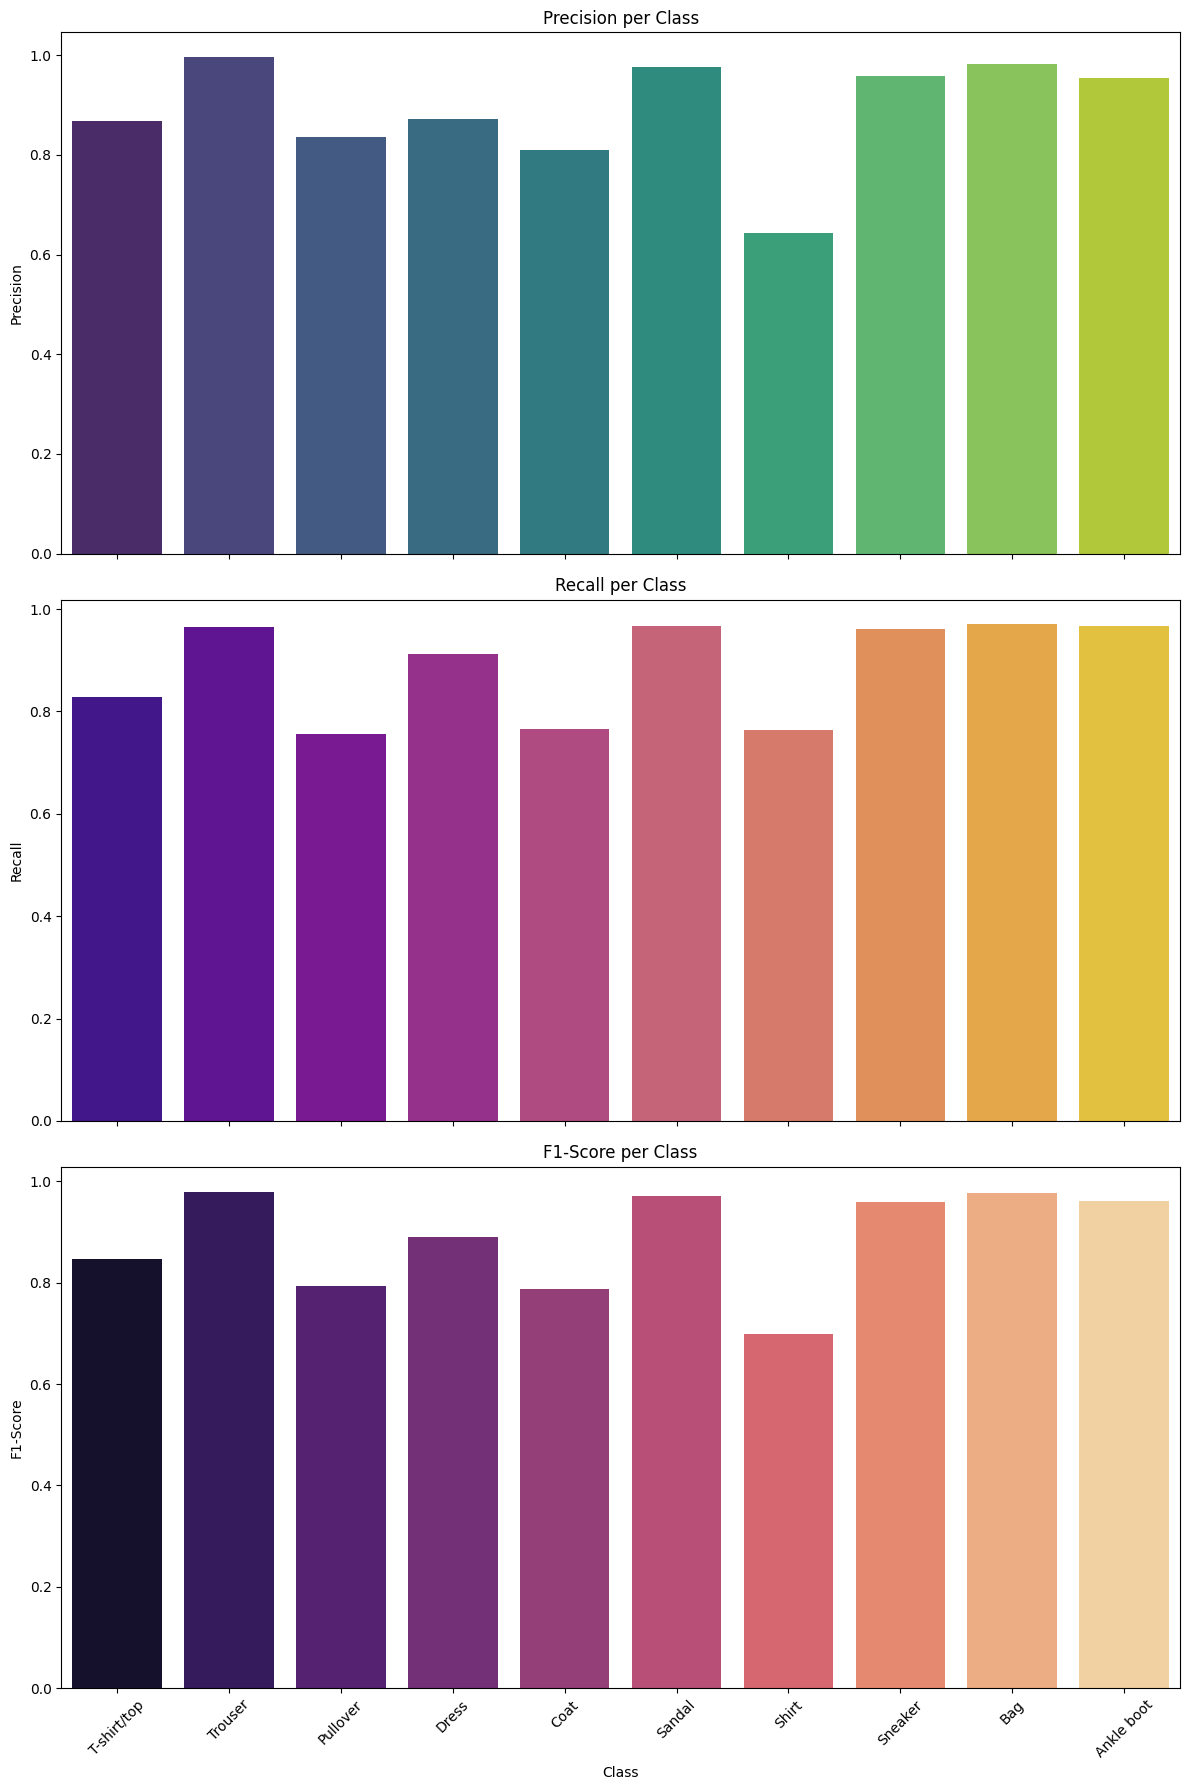

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Added this import

# Re-make predictions and generate report to get fresh data in dictionary format
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract precision, recall, and f1-score for each class
metrics_data = {
    'Class': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for class_name in class_names:
    metrics_data['Class'].append(class_name)
    metrics_data['Precision'].append(report[class_name]['precision'])
    metrics_data['Recall'].append(report[class_name]['recall'])
    metrics_data['F1-Score'].append(report[class_name]['f1-score'])

df_metrics = pd.DataFrame(metrics_data)

# Plotting the metrics
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Precision plot
sns.barplot(ax=axes[0], x='Class', y='Precision', data=df_metrics, palette='viridis')
axes[0].set_title('Precision per Class')
axes[0].set_ylabel('Precision')
axes[0].tick_params(axis='x', rotation=45)

# Recall plot
sns.barplot(ax=axes[1], x='Class', y='Recall', data=df_metrics, palette='plasma')
axes[1].set_title('Recall per Class')
axes[1].set_ylabel('Recall')
axes[1].tick_params(axis='x', rotation=45)

# F1-Score plot
sns.barplot(ax=axes[2], x='Class', y='F1-Score', data=df_metrics, palette='magma')
axes[2].set_title('F1-Score per Class')
axes[2].set_ylabel('F1-Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Display the shapes of the loaded data
print(f"Shape of training images: {train_images.shape}")
print(f"Shape of training labels: {train_labels.shape}")
print(f"Shape of test images: {test_images.shape}")
print(f"Shape of test labels: {test_labels.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)
